from keras import XXX -> from tensorflow.keras import xx

In [24]:
from tensorflow.keras.datasets import mnist
# ((x_train, y_train), (x_test, y_test))
# ((訓練題目, 訓練答案), (測試題目, 測試答案))
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [25]:
# 一定要做步驟: 看一下訓練資料測試資料有幾筆

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


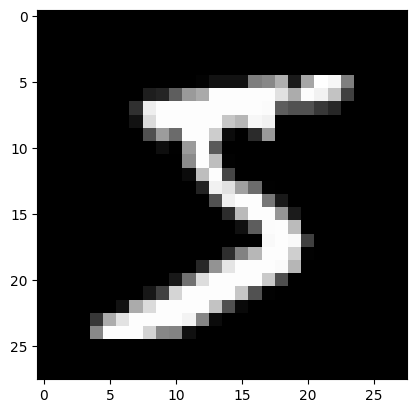

In [26]:
# colormap: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# reverse: _r
import pandas as pd
import matplotlib.pyplot as plt

# 灰階圖片(0: 黑色 255: 白色)
pd.DataFrame(x_train[0])
plt.imshow(x_train[0], cmap="gray")

## 激活函式的選擇很重要

1. 輸出層: 看狀況
2. 中間層: relu family(m=1)

In [27]:
# import pandas as pd
# pd.DataFrame(x_train[0])

In [28]:
# 建立模型
# models(地基): Sequential(一層疊一層) Model(自由疊層)
# layers: Dense(全連接層)
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# layers = [
#     # 第一層: input_dim -> 告訴他輸入有幾個
#     # 784 * 128 + 128(bias)
#     Dense(128, activation="sigmoid", input_dim=784),
#     # 128 * 10(神經元的連結) + 10(bias(10個輸出, 10個激活 -> 10個偏差))
#     Dense(10, activation="sigmoid")
# ]
# model = Sequential(layers)
# model.summary()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias)
    Dense(256, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


$ p_i = 正確答案 $
$ q_i = 預測值 $

$ Categorical Crossentropy (標準 ce) = \sum p_i log\frac{1}{q_i} $

如果你最後輸出只有一個的時候你要使用 BinaryCrossentropy

因為你輸出的q -> q: 1這種東西 (1-q): 另外一種東西

$ binary crossentropy = p log \frac {1}{q} + (1-p) log \frac {1}{1-q} $ 

連鎖法則
= 整體m = 每一段斜率相乘

In [29]:
#確定模型訓練方式 .... 等
#隨機(隨便一組weights) 梯度(正確方向) 下降
# loss: 最後輸出一個: binary_crossentropy, 最後輸出多個: categorical_crossentropy
# optimizer: 下降的時候優化 -> 基於動量(我在走的時候不是等速度， 而是有速度的累積)
# crossentropy
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(), metrics=["accuracy"])
#model.compile(loss="mse", metrics=["accuracy"])

In [30]:

# y
# 2. 答案預處理(One-hot encoding)
# 希望的樣子: [p0, p1 , ..., p9]
# 5: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# 可能輸出: [0, 0, 0, 0.2, 0, 0.8, 0, 0, 0, 0]
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print('原來: ', y_train[0])
print('後來: ',y_train_cat[0])

原來:  5
後來:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [31]:
#資料預處理
# 1. 題目預處理(Normalize)
# Keras在準備隨機那組weights, 跟 Normalize的圖片比較搭
# 1. 第一種方式: 0 - 1  第二種方式:  -1 - 1
#攤開 -> Keras MLP 規定一定要攤開成為1D

# x_train_shape =x_train.reshape(-1, 784) / 255
# x_test_shape =x_test.reshape(-1, 784) / 255
# #Demo  
# x_train_shape[0]

In [32]:

import numpy as np
# tensorflow建議: x(0~1) x(-1~1)
# tensorflow隨機的weight有配合
# reshape你可以把一個位置替換成-1(讓他自己算)
# x_train.reshape(60000, 784)
x_train_norm = x_train.reshape(-1, 784) / 255.0
x_test_norm = x_test.reshape(-1, 784) / 255.0
print(x_train_norm.shape)
print(x_test_norm.shape)

(60000, 784)
(10000, 784)


In [33]:

# epochs: 決定要把整份資料看過幾輪
# 絕對不是越多越好, 越多越過擬和, 反而導致現實資料錯更多
# validation_split: 擬要切出一部分不給模型看, 來驗證這組參數表現得如何
# 一輪: 54000(90%) / 100 -> 540
# 10 epochs: 540 * 10
# model.fit(x_train_norm,
#      y_train_cat,
#      batch_size=100,
#      epochs=40,
#      validation_split=0.1)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
c = [
    ModelCheckpoint("mnist.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train_cat,
     batch_size=100,
     epochs=40,
     validation_split=0.1,
     callbacks=c)

Epoch 1/40
540/540 [==============================] - 1s 2ms/step - loss: 0.2887 - accuracy: 0.9171 - val_loss: 0.1300 - val_accuracy: 0.9613
Epoch 2/40
540/540 [==============================] - 2s 3ms/step - loss: 0.1251 - accuracy: 0.9626 - val_loss: 0.0898 - val_accuracy: 0.9738
Epoch 3/40
540/540 [==============================] - 1s 2ms/step - loss: 0.0856 - accuracy: 0.9748 - val_loss: 0.0774 - val_accuracy: 0.9772
Epoch 4/40
540/540 [==============================] - 1s 1ms/step - loss: 0.0636 - accuracy: 0.9808 - val_loss: 0.0717 - val_accuracy: 0.9788
Epoch 5/40
540/540 [==============================] - 1s 1ms/step - loss: 0.0501 - accuracy: 0.9847 - val_loss: 0.0787 - val_accuracy: 0.9763
Epoch 6/40
540/540 [==============================] - 1s 1ms/step - loss: 0.0407 - accuracy: 0.9881 - val_loss: 0.0696 - val_accuracy: 0.9803
Epoch 7/40
540/540 [==============================] - 1s 1ms/step - loss: 0.0322 - accuracy: 0.9908 - val_loss: 0.0755 - val_accuracy: 0.9795
Epoch 

In [34]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0711 - accuracy: 0.9812


[0.07112455368041992, 0.9811999797821045]

如果你在tf裡, 你的答案都是帶one-hot encoding 不是的畫 都帶原本

In [35]:
import pandas as pd
#predict: 機率 predict_classes: 分類
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=1)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
       index=["{}(true)".format(i) for i in range(10)],
       columns=["{}(pred)".format(i) for i in range(10)])

,0(pred),1(pred),2(pred),3(pred),4(pred),5(pred),6(pred),7(pred),8(pred),9(pred)
0(true),974,0,0,1,0,0,1,1,3,0
1(true),0,1130,2,1,0,0,0,1,1,0
2(true),5,0,1009,1,1,0,2,8,6,0
3(true),0,0,1,994,0,4,0,5,2,4
4(true),3,0,3,0,959,0,2,2,1,12
5(true),3,0,0,8,1,869,4,0,5,2
6(true),6,3,2,1,1,9,934,0,2,0
7(true),1,2,5,3,0,0,0,1009,3,5
8(true),4,0,2,3,4,1,1,4,952,3
9(true),1,2,0,6,6,3,0,6,3,982


In [36]:

# 如果你不帶參數, 他會展開成為一個list, 把最大位置列出來
# 如果你帶入axis這個參數, axis=0, 直的看, 找最大值所在位置
#             axis=1(-1), 橫的看
np.array([
    [1, 3],
    [0.5, 2]
]).argmax(axis=1)

array([1, 1], dtype=int64)

In [37]:
# demo: nonzero
np.nonzero(np.array([
    [0, 1],
    [0, 0],
    [0, 2]
]))

(array([0, 2], dtype=int64), array([1, 1], dtype=int64))

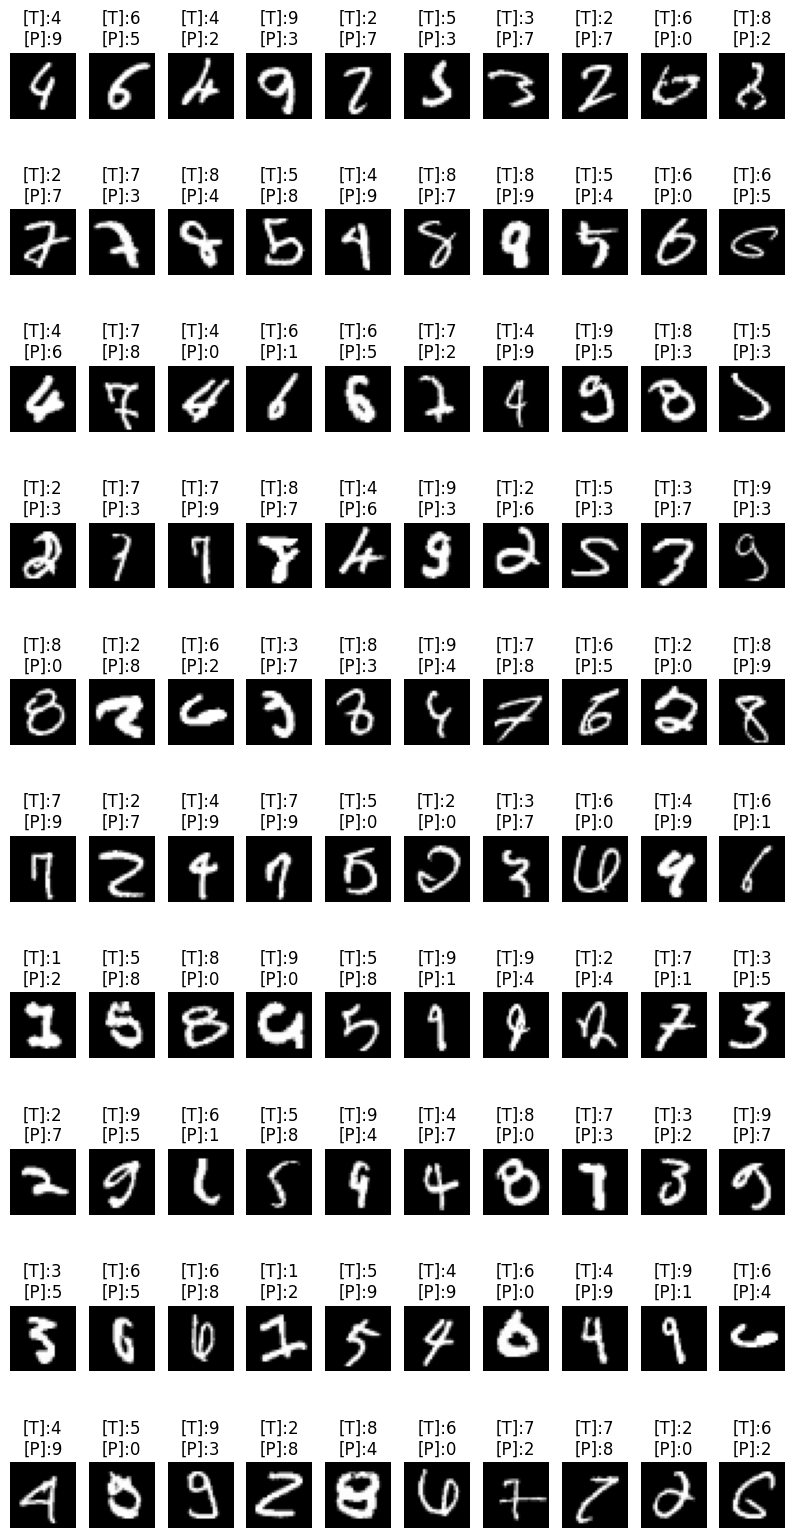

In [38]:
idx = np.nonzero(y_test != pre)[0]
idx = idx[:100]
plt.figure(figsize=(10, 20))
# 預測錯誤的預測值
fp_pred = pre[idx]
# 預測錯誤的真實值
fp_true = y_test[idx]
# 預測錯誤的圖片
fp_img = x_test[idx]
for i in range(len(idx)):
    plt.subplot(10, 10, i+1)
    plt.axis("off")
    t = "[T]:{}\n[P]:{}".format(fp_true[i], fp_pred[i])
    plt.title(t)
    plt.imshow(fp_img[i], cmap="gray")

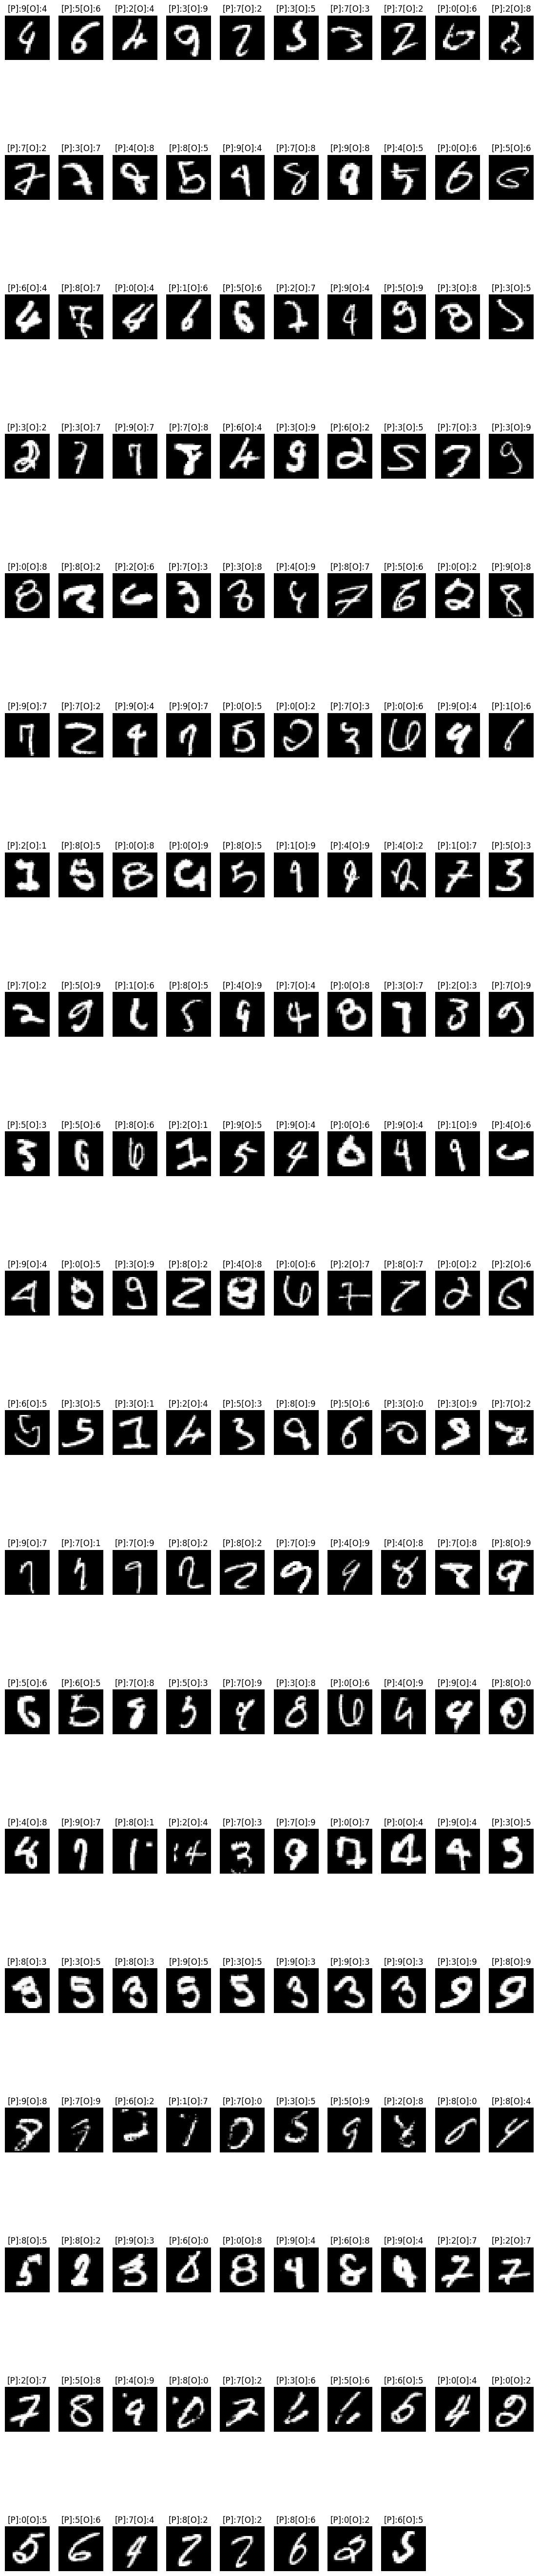

In [39]:
# numpy 才能這樣直接每個數字比較
# list: listp][一個數字]
# numpy array: nparray[ [多個數字] ]
diff = np.nonzero(pre != y_test)[0]
# 預測錯誤的圖的原本標籤
orifalse = y_test[diff]
# 預測錯誤的圖的預測標籤
prefalse =pre[diff]
# 把圖拿出來
imgfalse = x_test[diff]
# 整張圖的寬高
plt.figure(figsize=(14,70))
# 我們每一個列就是10個
width = 10
height = int(len(imgfalse) / 10) + 1
for (i, img) in enumerate(imgfalse):
    #(列數, 行數, 第幾張圖(i開始))
    plt.subplot(height, width, i + 1)
    plt.axis('off')
    t = '[P]:' + str(prefalse[i]) + '[O]:' + str(orifalse[i])
    plt.title(t)
    plt.imshow(img, cmap='gray')

In [42]:
import io
Image.frombytes("L", (28, 28), x_test[0]).save("test.png")

NameError: name 'Image' is not defined

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# testx = x_test[0].reshape(1, 784) / 255.0
# model.predict(testx)

0 的機率是: 0.0048
1 的機率是: 0.001
2 的機率是: 0.0094
3 的機率是: 0.0017
4 的機率是: 0.2483
5 的機率是: 0.2647
6 的機率是: 0.4027
7 的機率是: 0.0085
8 的機率是: 0.0561
9 的機率是: 0.0027
最高機率是: 6


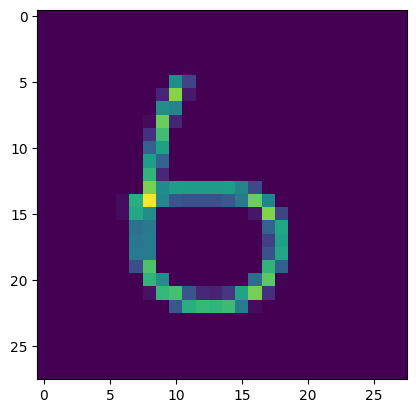

In [43]:

from PIL import Image
fn = "test.png" #@param {type:"string"}
img = Image.open(fn).resize((28, 28)).convert("L")
img_np = np.array(img)
testx = img_np.reshape(1, 784) / 255.0
probas = model.predict(testx)[0]
for i in range(10):
    print(i, "的機率是:", round(probas[i], 4))
ans = probas.argmax(axis=-1)
print("最高機率是:", ans)
plt.imshow(img_np)

In [ ]:

# import math
# cases = [
#     (0.9999, 0.0001),
#     (0.5, 0.5),
#     (0.0001, 0.9999),
#     (0.6, 0.4)
# ]
# for q1, q2 in cases:
#     ce = 0.6 * math.log(1/q1, 2) + 0.4 * math.log(1/q2, 2)
#     print(q1, q2, "->", ce)

In [ ]:
import tensorflow as tf
# 查看gpu和cpu的数量
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
cpus = tf.config.experimental.list_physical_devices(device_type='CPU')
print(gpus, cpus)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]